In [1]:
#step 4: pretty graphs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette('colorblind')
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('all_data.csv')

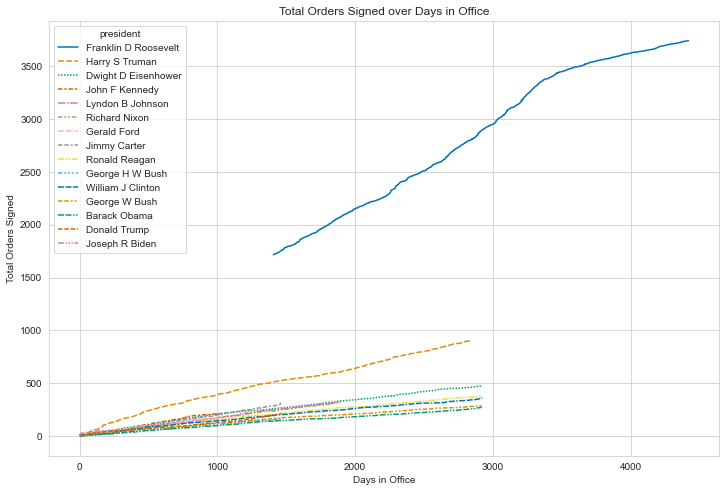

In [5]:
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(x='days', y='count', data=df, hue='president', style='president', palette='colorblind')
plt.title('Total Orders Signed over Days in Office')
plt.xlabel('Days in Office')
plt.ylabel('Total Orders Signed')
plt.savefig('img_full_plot.png', bbox_inches='tight')
plt.show()

In [6]:
df_subset = df[df['president'] != 'Franklin D Roosevelt']

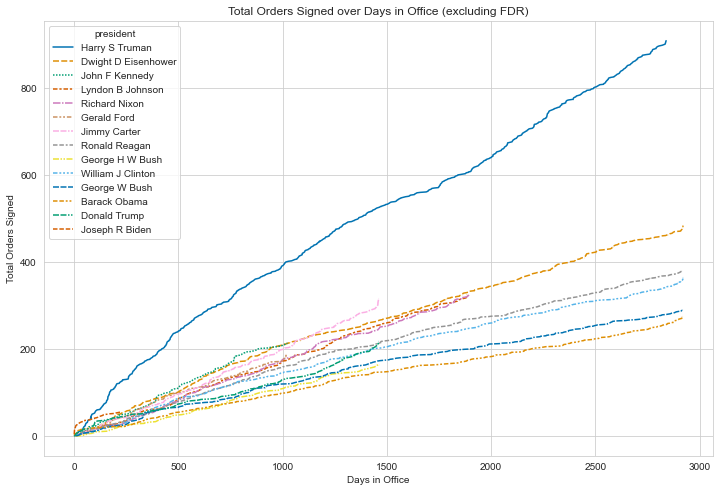

In [7]:
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(x='days', y='count', data=df_subset, hue='president', style='president', palette='colorblind')
plt.title('Total Orders Signed over Days in Office (excluding FDR)')
plt.xlabel('Days in Office')
plt.ylabel('Total Orders Signed')
plt.savefig('img_sans_FDR.png', bbox_inches='tight')
plt.show()

In [8]:
df_subsub = df_subset[df_subset['president'] != 'Harry S Truman']

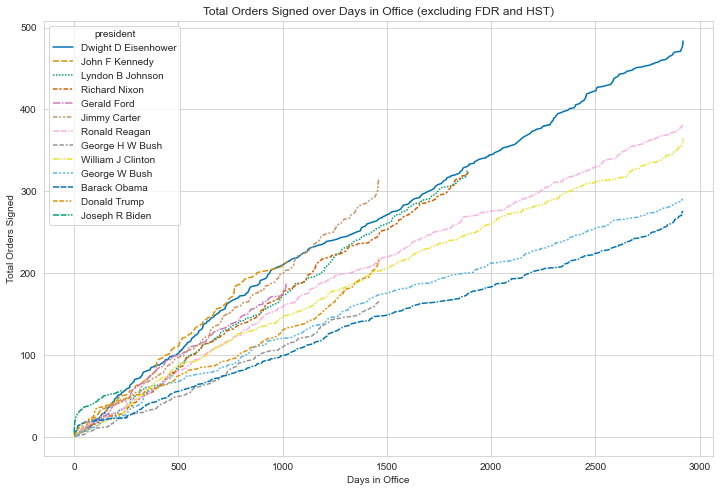

In [9]:
fig, ax = plt.subplots(figsize = (12,8))

sns.lineplot(x='days', y='count', data=df_subsub, hue='president', style='president', palette='colorblind')
plt.title('Total Orders Signed over Days in Office (excluding FDR and HST)')
plt.xlabel('Days in Office')
plt.ylabel('Total Orders Signed')
plt.savefig('img_sans_FDR_HST.png', bbox_inches='tight')
plt.show()

In [10]:
preses = df.president.unique()
print(preses)

['Franklin D Roosevelt' 'Harry S Truman' 'Dwight D Eisenhower'
 'John F Kennedy' 'Lyndon B Johnson' 'Richard Nixon' 'Gerald Ford'
 'Jimmy Carter' 'Ronald Reagan' 'George H W Bush' 'William J Clinton'
 'George W Bush' 'Barack Obama' 'Donald Trump' 'Joseph R Biden']


In [11]:
totals = df.groupby('president')[['days', 'count']].max()
totals = totals.reindex(preses)
totals['years'] = totals['days'] / 365
totals['OPY'] = totals['count'] / totals['years']

df_first_100 = df[df['days'] <= 100]
first_100 = df_first_100.groupby('president')[['days', 'count']].max()
first_100 = first_100.reindex(preses)

summ_stats = totals.merge(first_100, left_index=True, right_index=True, suffixes=('_total', '_first_100'))
print(summ_stats)

                      days_total  count_total      years         OPY  \
president                                                              
Franklin D Roosevelt        4421       3740.0  12.112329  308.776295   
Harry S Truman              2839        908.0   7.778082  116.738288   
Dwight D Eisenhower         2920        484.0   8.000000   60.500000   
John F Kennedy              1023        214.0   2.802740   76.353861   
Lyndon B Johnson            1885        325.0   5.164384   62.931034   
Richard Nixon               1893        325.0   5.186301   62.665082   
Gerald Ford                 1016        190.0   2.783562   68.257874   
Jimmy Carter                1460        320.0   4.000000   80.000000   
Ronald Reagan               2920        381.0   8.000000   47.625000   
George H W Bush             1460        166.0   4.000000   41.500000   
William J Clinton           2920        366.0   8.000000   45.750000   
George W Bush               2918        291.0   7.994521   36.39

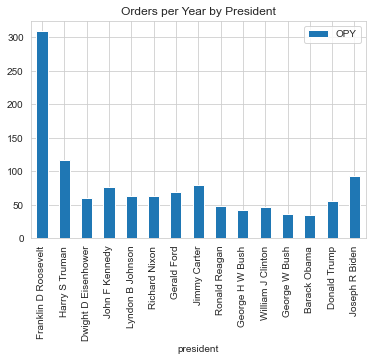

In [12]:
summ_stats.plot.bar(y='OPY', title='Orders per Year by President')
plt.savefig('img_opy.png', bbox_inches='tight')
plt.show()

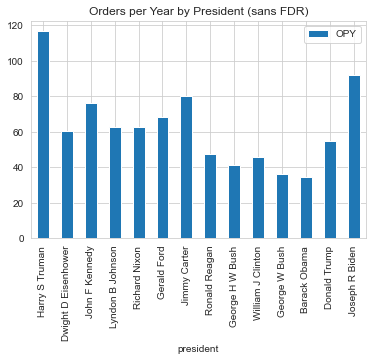

In [13]:
summ_stats_sans_FDR = summ_stats.drop(index='Franklin D Roosevelt')
summ_stats_sans_FDR.plot.bar(y='OPY', title='Orders per Year by President (sans FDR)')
plt.savefig('img_opy_sans_FDR.png', bbox_inches='tight')
plt.show()

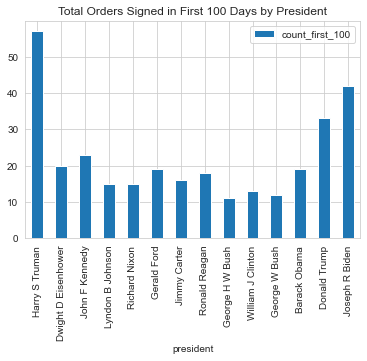

In [14]:
summ_stats_sans_FDR.plot.bar(y='count_first_100', title='Total Orders Signed in First 100 Days by President')
plt.savefig('img_first_100.png', bbox_inches='tight')
plt.show()

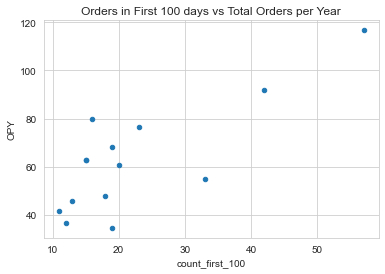

In [15]:
summ_stats.plot(x='count_first_100', y='OPY', kind='scatter', title='Orders in First 100 days vs Total Orders per Year')
plt.savefig('img_first100_vs_opy.png', bbox_inches='tight')
plt.show()